In [4]:
from drive.MyDrive.datas.module.preprocess import *
from drive.MyDrive.datas.module.setting_tf import *
from drive.MyDrive.datas.module.visualization import *

In [5]:
dataset = get_dataset()

In [6]:
datas = split_train_valid_df(dataset=dataset, img_size=224, shuffle=True)

In [7]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

In [8]:
# MinMaxScaling
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [9]:
name = "resnet"
base_model = load_base_model(name, input_shape=(224, 224, 3), trainable=False)

model = make_network(base_model, name)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 24,132,609
Trainable params: 567,809
Non-trainable params: 23,564,800
______________________________________

In [10]:
monitor_ls = ["val_accuracy", "val_loss"]
callbacks = setting_callback(name, monitors=monitor_ls)

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_data=(X_valid, y_valid), verbose=1,
                    callbacks=callbacks)

Epoch 1/150
221/221 [==============================] - 36s 83ms/step - loss: 0.3765 - accuracy: 0.8348 - val_loss: 0.3024 - val_accuracy: 0.8794

Epoch 00001: val_accuracy improved from -inf to 0.87940, saving model to /content/drive/MyDrive/datas/model_result/Resnet_acc.h5

Epoch 00001: val_loss improved from inf to 0.30237, saving model to /content/drive/MyDrive/datas/model_result/Resnet_loss.h5
Epoch 2/150
221/221 [==============================] - 16s 73ms/step - loss: 0.2461 - accuracy: 0.9064 - val_loss: 0.2822 - val_accuracy: 0.8880

Epoch 00002: val_accuracy improved from 0.87940 to 0.88804, saving model to /content/drive/MyDrive/datas/model_result/Resnet_acc.h5

Epoch 00002: val_loss improved from 0.30237 to 0.28220, saving model to /content/drive/MyDrive/datas/model_result/Resnet_loss.h5
Epoch 3/150
221/221 [==============================] - 16s 73ms/step - loss: 0.1918 - accuracy: 0.9286 - val_loss: 0.2769 - val_accuracy: 0.8900

Epoch 00003: val_accuracy improved from 0.888

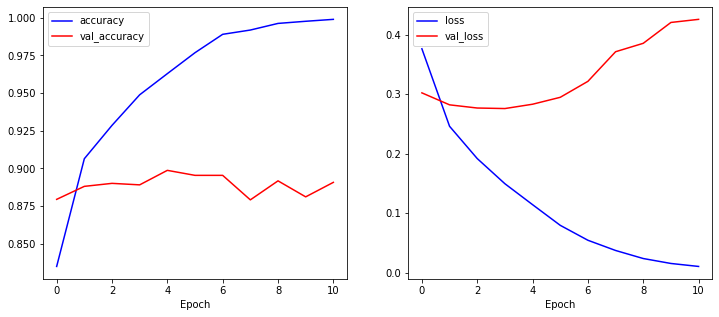

In [ ]:
make_scores_graph(history=history)